In [931]:
import pandas as pd
import datetime as dt
import numpy as np
import sqlite3
pd.set_option("display.precision", 3)

# BMO

In [932]:
df = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\BMO Cash Flow.xlsx', sheet_name='BMO Flows')

In [933]:
df.insert(loc=0, column='Platform', value='BMO Architect', allow_duplicates=True)

In [934]:
df.head()

,Platform,Model / Manager Name,Sponsor Name,Curr,Account System ID,Cash Flow Date,Cash Flow Amount,Holding Flow Amount,Reporting Date,Type
0,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000369,1/4/2022,"-1,405.3500",0,2022-01-31,Outflow
1,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,1/1/2022,-49.0300,0,2022-01-31,Outflow
2,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,1/12/2022,-1.2600,0,2022-01-31,Outflow
3,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,1/13/2022,-0.7500,0,2022-01-31,Outflow
4,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,1/15/2022,-12.2300,0,2022-01-31,Outflow


In [935]:
df['Cash Flow Date'] = pd.to_datetime(df['Cash Flow Date'])

In [936]:
df['Date'] = df['Cash Flow Date'].dt.strftime('%m-%Y')

In [937]:
df.head()

,Platform,Model / Manager Name,Sponsor Name,Curr,Account System ID,Cash Flow Date,Cash Flow Amount,Holding Flow Amount,Reporting Date,Type,Date
0,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000369,2022-01-04,"-1,405.3500",0,2022-01-31,Outflow,01-2022
1,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,2022-01-01,-49.0300,0,2022-01-31,Outflow,01-2022
2,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,2022-01-12,-1.2600,0,2022-01-31,Outflow,01-2022
3,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,2022-01-13,-0.7500,0,2022-01-31,Outflow,01-2022
4,BMO Architect,Manulife Canadian Equity,Manulife Asset Mgmt,CAD,U00000624,2022-01-15,-12.2300,0,2022-01-31,Outflow,01-2022


In [938]:
df1 = pd.DataFrame(df, columns= ['Platform','Sponsor Name','Model / Manager Name','Curr','Date','Cash Flow Amount'])

In [939]:
df1.head()

,Platform,Sponsor Name,Model / Manager Name,Curr,Date,Cash Flow Amount
0,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,"-1,405.3500"
1,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-49.0300
2,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-1.2600
3,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-0.7500
4,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-12.2300


In [940]:
df1.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Model / Manager Name' : 'Mandate', 'Curr' :'Currency', 'Cash Flow Amount' :'Sales/Redemptions'}, inplace=True)

In [941]:
df1.head()

,Platform,Sponsor Name,Mandate,Currency,Date,Sales/Redemptions
0,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,"-1,405.3500"
1,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-49.0300
2,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-1.2600
3,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-0.7500
4,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-12.2300


In [942]:
df1['Type Condition']= np.where(df1['Sales/Redemptions'] > 0, True, False)

In [943]:
df1['Type'] = df1['Type Condition'].map({True: 'Sales', False: 'Redemptions'})

In [944]:
df1.head()

,Platform,Sponsor Name,Mandate,Currency,Date,Sales/Redemptions,Type Condition,Type
0,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,"-1,405.3500",False,Redemptions
1,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-49.0300,False,Redemptions
2,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-1.2600,False,Redemptions
3,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-0.7500,False,Redemptions
4,BMO Architect,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,01-2022,-12.2300,False,Redemptions


In [945]:
BMOSales = pd.DataFrame(df1, columns= ['Platform','Mandate','Currency','Date','Type','Sales/Redemptions'])

In [946]:
BMOSales.head()

,Platform,Mandate,Currency,Date,Type,Sales/Redemptions
0,BMO Architect,Manulife Canadian Equity,CAD,01-2022,Redemptions,"-1,405.3500"
1,BMO Architect,Manulife Canadian Equity,CAD,01-2022,Redemptions,-49.0300
2,BMO Architect,Manulife Canadian Equity,CAD,01-2022,Redemptions,-1.2600
3,BMO Architect,Manulife Canadian Equity,CAD,01-2022,Redemptions,-0.7500
4,BMO Architect,Manulife Canadian Equity,CAD,01-2022,Redemptions,-12.2300


In [947]:
BMOSales= BMOSales.groupby(['Date','Platform','Mandate','Currency', 'Type']).agg({'Sales/Redemptions' :sum}).add_prefix('Total_')

In [948]:
BMOSales.head()

Total_Sales/Redemptions
Date    Platform      Mandate                        Currency Type                                
01-2022 BMO Architect Manulife Canadian Equity       CAD      Redemptions          -1,716,824.5300
                                                              Sales                 3,839,946.9900
                      Manulife North American Equity CAD      Redemptions            -843,352.4000
                                                              Sales                 3,693,185.6200
                      Manulife U.S. Dividend Equity  USD      Redemptions          -2,154,223.1900

In [949]:
BMOSalesNew = BMOSales.reset_index().copy()

In [950]:
BMOSalesNew.head()

,Date,Platform,Mandate,Currency,Type,Total_Sales/Redemptions
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,Redemptions,"-1,716,824.5300"
1,01-2022,BMO Architect,Manulife Canadian Equity,CAD,Sales,"3,839,946.9900"
2,01-2022,BMO Architect,Manulife North American Equity,CAD,Redemptions,"-843,352.4000"
3,01-2022,BMO Architect,Manulife North American Equity,CAD,Sales,"3,693,185.6200"
4,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,Redemptions,"-2,154,223.1900"


In [951]:
BMOsales= pd.pivot_table(BMOSales, values='Total_Sales/Redemptions', index=['Date','Platform','Mandate','Currency'],
                    columns=['Type'], aggfunc=np.sum).reset_index()

In [952]:
BMOsales.head()

Type,Date,Platform,Mandate,Currency,Redemptions,Sales
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"-1,716,824.5300","3,839,946.9900"
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"-843,352.4000","3,693,185.6200"
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"-2,154,223.1900","1,567,431.8700"


In [953]:
BMOassets = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\BMO Monthly AUM.xlsx', sheet_name='BMO AUM')

In [954]:
BMOassets.head()

,Sponsor Name,Manager / Model Name,Model Preferred Currency,Tax Mgd(Y/N),Account System ID,Open Date,Advisor Name,Advisor Branch,Advisor System ID,AUM,AUM (Firm Currency),Reporting Date,Type
0,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,N,U00000009,2005-08-19 00:00:00,ANDY KURCZ / ADV,Hamilton / Niagara,N8R,"446,132.0600","446,132.0600",2022-01-31,Assets
1,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,N,U00000369,2014-12-31 00:00:00,LUC BLANCHARD ARCH-MPA,Sherbrooke,DGC,"306,334.0900","306,334.0900",2022-01-31,Assets
2,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,N,U00000672,2019-11-14 00:00:00,LUC BLANCHARD ARCH-MPA,Sherbrooke,DGC,"88,406.7100","88,406.7100",2022-01-31,Assets
3,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,N,U00000688,2010-09-22 00:00:00,LUC BLANCHARD ARCH-MPA,Sherbrooke,DGC,"2,400,213.2200","2,400,213.2200",2022-01-31,Assets
4,Manulife Asset Mgmt,Manulife Canadian Equity,CAD,N,U00002166,2007-02-01 00:00:00,ANWAR HUSAIN,Toronto - St. Clair,KQI,"329,626.2600","329,626.2600",2022-01-31,Assets


In [955]:
BMOA = pd.DataFrame(BMOassets, columns= ['Sponsor Name','Manager / Model Name','AUM (Firm Currency)'])
BMOA.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)

In [956]:
BMOA.head()

,Currency,Sponsor Name,Manager / Model Name,AUM (Firm Currency)
0,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"446,132.0600"
1,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"306,334.0900"
2,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"88,406.7100"
3,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"2,400,213.2200"
4,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"329,626.2600"


In [957]:
BMOA.rename(columns={'Manager / Model Name' : 'Mandate', 'Currency' :'Currency', 'AUM (Firm Currency)' :'Assets'}, inplace=True)

In [958]:
BMOA.insert(loc=0, column='Platform', value='BMO Architect', allow_duplicates=True)

In [959]:
BMOA.head()

,Platform,Currency,Sponsor Name,Mandate,Assets
0,BMO Architect,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"446,132.0600"
1,BMO Architect,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"306,334.0900"
2,BMO Architect,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"88,406.7100"
3,BMO Architect,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"2,400,213.2200"
4,BMO Architect,CAD,Manulife Asset Mgmt,Manulife Canadian Equity,"329,626.2600"


In [960]:
BMOA.rename(columns={'Platform' :'Platform','Mandate' : 'Mandate','Currency' : 'Currency','AUM (Firm Currency)' :'Assets'}, inplace=True)

In [961]:
BMOAssets= BMOA.groupby(['Platform','Sponsor Name','Mandate', 'Currency']).agg({'Assets' :sum})


In [962]:
pd.set_option("display.precision", 3)

In [963]:
BMOAssets.head()

Assets
Platform      Sponsor Name        Mandate                        Currency                 
BMO Architect Manulife Asset Mgmt Manulife Canadian Equity       CAD      207,154,419.6400
                                  Manulife North American Equity CAD       84,311,239.0300
                                  Manulife U.S. Dividend Equity  CAD      199,028,239.3500

In [964]:
BMO=pd.merge(BMOsales[['Date','Platform','Mandate','Currency','Sales','Redemptions']],BMOAssets, on=['Mandate'],how='left')
BMO

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"3,839,946.9900","-1,716,824.5300","207,154,419.6400"
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"3,693,185.6200","-843,352.4000","84,311,239.0300"
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"1,567,431.8700","-2,154,223.1900","199,028,239.3500"


In [965]:
BMO

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"3,839,946.9900","-1,716,824.5300","207,154,419.6400"
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"3,693,185.6200","-843,352.4000","84,311,239.0300"
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"1,567,431.8700","-2,154,223.1900","199,028,239.3500"


# Canaccord

In [966]:
Canaccord = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\Canaccord Managed Product Advisor Master Grid.xlsx', sheet_name='Canaccord AUM & Flows')

In [967]:
Canaccord

,Platform,Advisor,Mandate,ReportingDate,CommissionDate,Market Value,Sales,Redemptions
0,Canaccord,Jamie Switzer,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"1,876,884.1100","262,144.0400",NaN
1,Canaccord,Lori Pinkowski,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"9,296,148.5000","79,243.1000",NaN
2,Canaccord,Jeffrey Scruton,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"784,799.1500",NaN,"16,030.0500"
3,Canaccord,Lori Pinkowski,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"21,634,758.7100","31,456.0660","112,270.7900"
4,Canaccord,Jarrett McKay,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"112,775.4700",NaN,NaN
5,Canaccord,Jarrett McKay,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"79,474.2700",NaN,NaN
6,Canaccord,John Lysnes,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"333,794.9900",NaN,NaN
7,Canaccord,John Lysnes,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"196,000.8700",NaN,NaN
8,Canaccord,Justin Lee,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"80,941.7300",NaN,NaN
9,Canaccord,Lindsay Kosnik,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"77,104.2900",NaN,NaN


In [968]:
Canaccord.insert(loc=0, column='Currency', value='USD', allow_duplicates=True)

In [969]:
Canaccord.head()

,Currency,Platform,Advisor,Mandate,ReportingDate,CommissionDate,Market Value,Sales,Redemptions
0,USD,Canaccord,Jamie Switzer,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"1,876,884.1100","262,144.0400",NaN
1,USD,Canaccord,Lori Pinkowski,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"9,296,148.5000","79,243.1000",NaN
2,USD,Canaccord,Jeffrey Scruton,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"784,799.1500",NaN,"16,030.0500"
3,USD,Canaccord,Lori Pinkowski,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"21,634,758.7100","31,456.0660","112,270.7900"
4,USD,Canaccord,Jarrett McKay,Manulife North American Dividend Income Manage...,2022-01-31,NaN,"112,775.4700",NaN,NaN


In [970]:
Canaccord_table = pd.DataFrame(Canaccord, columns= ['Platform','Mandate','ReportingDate', 'Currency','Sales','Redemptions','Market Value'])

In [971]:
Canaccord_table.rename(columns={'Platform' :'Platform','Mandate' : 'Mandate', 'ReportingDate' :'Date','Currency' : 'Currency', 'Sales' : 'Sales', 'Redemptions':'Redemptions','Market Value' :'Assets'}, inplace=True)

In [972]:
Canaccord_table.head()

,Platform,Mandate,Date,Currency,Sales,Redemptions,Assets
0,Canaccord,Manulife North American Dividend Income Manage...,2022-01-31,USD,"262,144.0400",NaN,"1,876,884.1100"
1,Canaccord,Manulife North American Dividend Income Manage...,2022-01-31,USD,"79,243.1000",NaN,"9,296,148.5000"
2,Canaccord,Manulife North American Dividend Income Manage...,2022-01-31,USD,NaN,"16,030.0500","784,799.1500"
3,Canaccord,Manulife North American Dividend Income Manage...,2022-01-31,USD,"31,456.0660","112,270.7900","21,634,758.7100"
4,Canaccord,Manulife North American Dividend Income Manage...,2022-01-31,USD,NaN,NaN,"112,775.4700"


In [973]:
Canaccord_table['Date'] = pd.to_datetime(Canaccord_table['Date'])
Canaccord_table['Date'] = Canaccord_table['Date'].dt.strftime('%m-%Y')
Canaccord_table.head()

,Platform,Mandate,Date,Currency,Sales,Redemptions,Assets
0,Canaccord,Manulife North American Dividend Income Manage...,01-2022,USD,"262,144.0400",NaN,"1,876,884.1100"
1,Canaccord,Manulife North American Dividend Income Manage...,01-2022,USD,"79,243.1000",NaN,"9,296,148.5000"
2,Canaccord,Manulife North American Dividend Income Manage...,01-2022,USD,NaN,"16,030.0500","784,799.1500"
3,Canaccord,Manulife North American Dividend Income Manage...,01-2022,USD,"31,456.0660","112,270.7900","21,634,758.7100"
4,Canaccord,Manulife North American Dividend Income Manage...,01-2022,USD,NaN,NaN,"112,775.4700"


In [974]:
Canaccord_groups= Canaccord_table.groupby(['Date','Platform','Mandate', 'Currency'])
Canaccord_data=Canaccord_groups.sum()
Canaccord_data.head().reset_index()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.0000,0.0000,"741,052.0900"
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.0000,0.0000,"501,991.9100"
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.0000,0.0000,"277,853.6900"
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,"372,843.2060","128,300.8400","37,698,700.8000"
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.0000,0.0000,"2,253,378.7700"


In [975]:
Canaccord_dataNew = Canaccord_data.reset_index().copy()

In [976]:
Canaccord_dataNew

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.0000,0.0000,"741,052.0900"
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.0000,0.0000,"501,991.9100"
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.0000,0.0000,"277,853.6900"
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,"372,843.2060","128,300.8400","37,698,700.8000"
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.0000,0.0000,"2,253,378.7700"
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.0000,0.0000,"106,160.0700"
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.0000,0.0000,"2,857,534.1900"


In [977]:
BMOCanaccord=pd.concat([BMO,Canaccord_dataNew])

In [978]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [979]:
BMOCanaccord

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# Manulife

In [980]:
Manulife = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\Manulife cash flow report.xlsx', sheet_name='Sheet1')

In [981]:
Manulife['Date'] = pd.to_datetime(Manulife['Date'])

In [982]:
Manulife['Date'] = Manulife['Date'].dt.strftime('%m-%Y')

In [983]:
Manulife.insert(loc=0, column='Platform', value='Manulife Securities', allow_duplicates=True)

In [984]:
Manulife.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)

In [985]:
Manulife.head()

,Currency,Platform,Model,Model_Description,Branch,IA,IA_Name,MTD Contribution,MTD Withdrawal,MTD Net,YTD Contribution,YTD Withdrawal,YTD Net,AUA,Date
0,CAD,Manulife Securities,CB2,Manulife Canadian Balanced Growth,206-5451 HIGHWAY 7; WOODBRIDGE; ON L4L 0B2;,C346,SUNIL HEDA,0.00,0.00,0.00,0.00,0.00,0.00,114880.38,01-2022
1,CAD,Manulife Securities,CB2,Manulife Canadian Balanced Growth,830-5160 BOUL DECARIE; MONTREAL QC H3X 2H9;,3T3N,J. CLEMENT,0.00,0.00,0.00,0.00,0.00,0.00,156605.59,01-2022
2,CAD,Manulife Securities,CB2,Manulife Canadian Balanced Growth,417 A HAZELDEAN RD; KANATA ON; K2L 4C6,JL37,PETER FRASER,0.00,0.00,0.00,0.00,0.00,0.00,158313.16,01-2022
3,CAD,Manulife Securities,CB2,Manulife Canadian Balanced Growth,237 LABRADOR DR; UNIT 1; WATERLOO ON,4WXP,GALL/WEB/YOU/MCG,0.00,0.00,0.00,0.00,0.00,0.00,361549.22,01-2022
4,CAD,Manulife Securities,CB2,Manulife Canadian Balanced Growth,1001 3rd Avenue S; Lethbridge; Alberta; T1J 0J3,8131,TERRY MAH,0.00,0.00,0.00,0.00,0.00,0.00,496005.22,01-2022


In [986]:
Manulife1 = pd.DataFrame(Manulife, columns= ['Platform','Model_Description','Currency','Date','MTD Net','AUA'])

In [987]:
Manulife1.head()

,Platform,Model_Description,Currency,Date,MTD Net,AUA
0,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,114880.38
1,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,156605.59
2,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,158313.16
3,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,361549.22
4,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,496005.22


In [988]:
Manulife1['Type Condition']= np.where(Manulife1['MTD Net'] > 0, True, False)

In [989]:
Manulife1['Type'] = Manulife1['Type Condition'].map({True: 'Sales', False: 'Redemptions'})

In [990]:
Manulife1.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Model_Description' : 'Mandate', 'Currency' :'Currency', 'MTD Net' :'Sales/Redemptions','AUA' : 'Assets'}, inplace=True)

In [991]:
Manulife1.head()

,Platform,Mandate,Currency,Date,Sales/Redemptions,Assets,Type Condition,Type
0,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,114880.38,False,Redemptions
1,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,156605.59,False,Redemptions
2,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,158313.16,False,Redemptions
3,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,361549.22,False,Redemptions
4,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,496005.22,False,Redemptions


In [992]:
ManulifeSalesNew = Manulife1.reset_index().copy()

In [993]:
ManulifeSalesNew.head()

,index,Platform,Mandate,Currency,Date,Sales/Redemptions,Assets,Type Condition,Type
0,0,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,114880.38,False,Redemptions
1,1,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,156605.59,False,Redemptions
2,2,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,158313.16,False,Redemptions
3,3,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,361549.22,False,Redemptions
4,4,Manulife Securities,Manulife Canadian Balanced Growth,CAD,01-2022,0.00,496005.22,False,Redemptions


In [994]:
ManulifeSales= pd.pivot_table(Manulife1, values='Sales/Redemptions', index=['Date','Platform','Mandate','Currency'],
                    columns=['Type'], aggfunc=np.sum).reset_index()

In [995]:
ManulifeSales.fillna(0)

Type,Date,Platform,Mandate,Currency,Redemptions,Sales
0,01-2022,Manulife Securities,Manulife Canadian Balanced Growth,CAD,-1165.88,0.00
1,01-2022,Manulife Securities,Manulife Canadian Equity Growth,CAD,0.00,102239.57
2,01-2022,Manulife Securities,Manulife Canadian Fixed Income,CAD,-46501.65,6708.84
3,01-2022,Manulife Securities,Manulife Corporate Fixed Income,CAD,-1089784.03,50000.00
4,01-2022,Manulife Securities,Manulife North American Dividend Income,CAD,-6757.93,545733.74
5,01-2022,Manulife Securities,Manulife North American Dividend Income Balanced,CAD,0.00,194828.01
6,01-2022,Manulife Securities,Manulife U.S. Dividend Income,CAD,-15949.87,0.00
7,01-2022,Manulife Securities,Manulife U.S. Large Cap Core Equity,CAD,0.00,14399.00


In [996]:
ManulifeSales1=Manulife1.groupby(['Date','Platform','Mandate','Currency']).agg({'Assets' :sum})

In [997]:
ManulifeSales1

Assets
Date    Platform            Mandate                                          Currency            
01-2022 Manulife Securities Manulife Canadian Balanced Growth                CAD       1457694.67
                            Manulife Canadian Equity Growth                  CAD       6356294.11
                            Manulife Canadian Fixed Income                   CAD      12120856.37
                            Manulife Corporate Fixed Income                  CAD       1568741.81
                            Manulife North American Dividend Income          CAD      21342881.49
                            Manulife North American Dividend Income Balanced CAD       7919556.00
                            Manulife U.S. Dividend Income                    CAD       5996596.72
                            Manulife U.S. Large Cap Core Equity              CAD      10744126.03

In [998]:
MAML=pd.merge(ManulifeSales[['Date','Platform','Mandate','Currency','Sales','Redemptions']],ManulifeSales1, on=['Mandate'],how='left')
MAML

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Manulife Securities,Manulife Canadian Balanced Growth,CAD,NaN,-1165.88,1457694.67
1,01-2022,Manulife Securities,Manulife Canadian Equity Growth,CAD,102239.57,0.00,6356294.11
2,01-2022,Manulife Securities,Manulife Canadian Fixed Income,CAD,6708.84,-46501.65,12120856.37
3,01-2022,Manulife Securities,Manulife Corporate Fixed Income,CAD,50000.00,-1089784.03,1568741.81
4,01-2022,Manulife Securities,Manulife North American Dividend Income,CAD,545733.74,-6757.93,21342881.49
5,01-2022,Manulife Securities,Manulife North American Dividend Income Balanced,CAD,194828.01,0.00,7919556.00
6,01-2022,Manulife Securities,Manulife U.S. Dividend Income,CAD,NaN,-15949.87,5996596.72
7,01-2022,Manulife Securities,Manulife U.S. Large Cap Core Equity,CAD,14399.00,0.00,10744126.03


In [999]:
BMOCanaccordManu=pd.concat([BMOCanaccord,MAML])

In [1000]:
BMOCanaccordManu

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# Wellington

In [1001]:
Wellington = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\Wellington AUM and Flows.xlsx', sheet_name='WA uploaded')

In [1002]:
Wellington.head()

,Platform,Fund,Account Number (at Wellington-Altus Private Wealth),Advisor Name,Advisor Code,Currency,Market Value (AUM),New Sales in the Month,Redemptions in the month,Date
0,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GXVA,G Sternigh & R Klewchuk,AD39,CAD,158806.47,NaN,NaN,2022-01-31
1,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GZZW,G Sternigh & R Klewchuk,AD39,CAD,118080.16,NaN,NaN,2022-01-31
2,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HGZ7,Elaine Knotek-Holmes,AD09,USD,100433.88,NaN,NaN,2022-01-31
3,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HJZE,G Sternigh & R Klewchuk,AD39,CAD,502385.25,NaN,NaN,2022-01-31
4,Wellington-Altus Private Wealth,Manulife NA Eq,2R2HQSR,Mark Purcell,AD47,CAD,392810.91,NaN,NaN,2022-01-31


In [1003]:
Wellington['Date'] = pd.to_datetime(Wellington['Date'])

In [1004]:
Wellington['Date'] = Wellington['Date'].dt.strftime('%m-%Y')

In [1005]:
Wellington.head()

,Platform,Fund,Account Number (at Wellington-Altus Private Wealth),Advisor Name,Advisor Code,Currency,Market Value (AUM),New Sales in the Month,Redemptions in the month,Date
0,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GXVA,G Sternigh & R Klewchuk,AD39,CAD,158806.47,NaN,NaN,01-2022
1,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GZZW,G Sternigh & R Klewchuk,AD39,CAD,118080.16,NaN,NaN,01-2022
2,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HGZ7,Elaine Knotek-Holmes,AD09,USD,100433.88,NaN,NaN,01-2022
3,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HJZE,G Sternigh & R Klewchuk,AD39,CAD,502385.25,NaN,NaN,01-2022
4,Wellington-Altus Private Wealth,Manulife NA Eq,2R2HQSR,Mark Purcell,AD47,CAD,392810.91,NaN,NaN,01-2022


In [1006]:
Wellington.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Fund ' : 'Mandate', 'Currency' :'Currency', 'New Sales in the Month' :'Sales','Redemptions in the month' :'Redemptions','Market Value (AUM)' : 'Assets'}, inplace=True)

In [1007]:
Wellington.head()

,Platform,Mandate,Account Number (at Wellington-Altus Private Wealth),Advisor Name,Advisor Code,Currency,Assets,Sales,Redemptions,Date
0,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GXVA,G Sternigh & R Klewchuk,AD39,CAD,158806.47,NaN,NaN,01-2022
1,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2GZZW,G Sternigh & R Klewchuk,AD39,CAD,118080.16,NaN,NaN,01-2022
2,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HGZ7,Elaine Knotek-Holmes,AD09,USD,100433.88,NaN,NaN,01-2022
3,Wellington-Altus Private Wealth,Manulife NA Dvd,2R2HJZE,G Sternigh & R Klewchuk,AD39,CAD,502385.25,NaN,NaN,01-2022
4,Wellington-Altus Private Wealth,Manulife NA Eq,2R2HQSR,Mark Purcell,AD47,CAD,392810.91,NaN,NaN,01-2022


In [1008]:
Wellington1 = pd.DataFrame(Wellington, columns= ['Date','Platform','Mandate','Currency','Sales','Redemptions','Assets'])

In [1009]:
Wellington1

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,NaN,NaN,158806.47
1,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,NaN,NaN,118080.16
2,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,USD,NaN,NaN,100433.88
3,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,NaN,NaN,502385.25
4,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,NaN,NaN,392810.91
5,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,NaN,NaN,513753.62
6,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,NaN,NaN,149420.42
7,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,NaN,NaN,240160.69
8,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,NaN,NaN,259360.41
9,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,NaN,NaN,530115.80


In [1010]:
Wellington_groups= Wellington1.groupby(['Date','Platform','Mandate', 'Currency'])
Wellington_data=Wellington_groups.sum()
Wellington_data.head().reset_index()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,830791.14,0.00,13953564.53
1,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,USD,0.00,0.00,1433315.34
2,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,0.00,0.00,9343711.01


In [1011]:
Wellington1New = Wellington_data.reset_index().copy()

In [1012]:
Wellington1New.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,CAD,830791.14,0.00,13953564.53
1,01-2022,Wellington-Altus Private Wealth,Manulife NA Dvd,USD,0.00,0.00,1433315.34
2,01-2022,Wellington-Altus Private Wealth,Manulife NA Eq,CAD,0.00,0.00,9343711.01


In [1013]:
BMOCanaccordManuWell=pd.concat([BMOCanaccordManu,Wellington1New])

In [1014]:
BMOCanaccordManuWell

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# Insustrial Alliance

In [1015]:
IA = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\IA Manulife AUM.xlsx', sheet_name='iA upload')
IA.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)
IA.head()

,Currency,Platform,Mandate,ReportingDate,IA Code,Advisor,Market Value,CommissionDate,Sales,Redemptions
0,CAD,Insustrial Alliance,North American Dividend Income Strategy,2022-01-31,SSUW,Greg Frost,145608.19,2022-01-31,NaN,NaN
1,CAD,Insustrial Alliance,North American Dividend Income Strategy,2022-01-31,SSUW,Greg Frost,143422.55,2022-01-31,NaN,NaN
2,CAD,Insustrial Alliance,North American Dividend Income Strategy,2022-01-31,SSUW,Greg Frost,141796.69,2022-01-31,NaN,NaN
3,CAD,Insustrial Alliance,North American Dividend Income Strategy,2022-01-31,SSUW,Greg Frost,180034.80,2022-01-31,NaN,NaN
4,CAD,Insustrial Alliance,North American Dividend Income Strategy,2022-01-31,SSUW,Greg Frost,207812.93,2022-01-31,NaN,NaN


In [1016]:
IA['ReportingDate'] = pd.to_datetime(IA['ReportingDate'])
IA['ReportingDate'] = IA['ReportingDate'].dt.strftime('%m-%Y')
IA.head()

,Currency,Platform,Mandate,ReportingDate,IA Code,Advisor,Market Value,CommissionDate,Sales,Redemptions
0,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,145608.19,2022-01-31,NaN,NaN
1,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,143422.55,2022-01-31,NaN,NaN
2,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,141796.69,2022-01-31,NaN,NaN
3,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,180034.80,2022-01-31,NaN,NaN
4,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,207812.93,2022-01-31,NaN,NaN


In [1017]:
IA.rename(columns={'ReportingDate' : 'Date', 'Platform' : 'Platform', 'Mandate' : 'Mandate', 'Currency' :'Currency', 'Sales' :'Sales','Redemptions' :'Redemptions','Market Value' : 'Assets'}, inplace=True)

In [1018]:
IA.head()

,Currency,Platform,Mandate,Date,IA Code,Advisor,Assets,CommissionDate,Sales,Redemptions
0,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,145608.19,2022-01-31,NaN,NaN
1,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,143422.55,2022-01-31,NaN,NaN
2,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,141796.69,2022-01-31,NaN,NaN
3,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,180034.80,2022-01-31,NaN,NaN
4,CAD,Insustrial Alliance,North American Dividend Income Strategy,01-2022,SSUW,Greg Frost,207812.93,2022-01-31,NaN,NaN


In [1019]:
IA1 = pd.DataFrame(IA, columns= ['Date','Platform','Mandate','Currency','Sales','Redemptions','Assets'])
IA1

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,145608.19
1,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,143422.55
2,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,141796.69
3,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,180034.80
4,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,207812.93
5,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,203523.63
6,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,175074.54
7,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,357393.93
8,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,2609005.87
9,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,NaN,NaN,194761.62


In [1020]:
IA_groups= IA1.groupby(['Date','Platform','Mandate', 'Currency'])
IA_data=IA_groups.sum()
IA_data.head().reset_index()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,0.00,0.00,4358434.75


In [1021]:
IANew = IA_data.reset_index().copy()
IANew

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Insustrial Alliance,North American Dividend Income Strategy,CAD,0.00,0.00,4358434.75


In [1022]:
BMOCanaccordManuWellIA=pd.concat([BMOCanaccordManuWell,IANew])
BMOCanaccordManuWellIA

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# Raymond James

In [1023]:
RJS = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\RJ - Manulife Cash Flows.xlsx', sheet_name='RJ Cash Flow')
RJS.insert(loc=0, column='Platform', value='Raymond James', allow_duplicates=True)
RJS.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)
RJS.head()

,Currency,Platform,Contributions/Withdrawal,IA (Account),Short Name,Process Date (Trans),Trade Date (Trans),Account Number,Portfolio Type,Cusip,Primary Symbol,Qty (Trans),Amount (Trans),Settlement Date (Trans),Transaction Code,MM Name,MM Fund Name,Trans MV,Reporting Date
0,CAD,Raymond James,Contributions,505P,RITA FABER,2022-01-05,2022-01-05,1AS-20PR-1,P,NaN,NaN,0,-115.13,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,115.13,2022-01-31
1,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-28,2022-01-28,1B5-14PK-0,P,NaN,NaN,0,-6000.00,2022-01-28,TCN - TFSA CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,6000.00,2022-01-31
2,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-18,2022-01-18,1B5-41PA-0,P,NaN,NaN,0,-1988.88,2022-01-18,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1988.88,2022-01-31
3,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-05,2022-01-05,1B5-41PA-0,P,NaN,NaN,0,-3601.40,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,3601.40,2022-01-31
4,CAD,Raymond James,Contributions,187P,ZUCCARO/ZUCCARO,2022-01-18,2022-01-18,1C4-6TPR-0,P,NaN,NaN,0,-1500.00,2022-01-18,CN - RRSP CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1500.00,2022-01-31


In [1024]:
RJS['Reporting Date'] = pd.to_datetime(RJS['Reporting Date'])
RJS['Date'] = RJS['Reporting Date'].dt.strftime('%m-%Y')
RJS.head()

,Currency,Platform,Contributions/Withdrawal,IA (Account),Short Name,Process Date (Trans),Trade Date (Trans),Account Number,Portfolio Type,Cusip,Primary Symbol,Qty (Trans),Amount (Trans),Settlement Date (Trans),Transaction Code,MM Name,MM Fund Name,Trans MV,Reporting Date,Date
0,CAD,Raymond James,Contributions,505P,RITA FABER,2022-01-05,2022-01-05,1AS-20PR-1,P,NaN,NaN,0,-115.13,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,115.13,2022-01-31,01-2022
1,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-28,2022-01-28,1B5-14PK-0,P,NaN,NaN,0,-6000.00,2022-01-28,TCN - TFSA CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,6000.00,2022-01-31,01-2022
2,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-18,2022-01-18,1B5-41PA-0,P,NaN,NaN,0,-1988.88,2022-01-18,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1988.88,2022-01-31,01-2022
3,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-05,2022-01-05,1B5-41PA-0,P,NaN,NaN,0,-3601.40,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,3601.40,2022-01-31,01-2022
4,CAD,Raymond James,Contributions,187P,ZUCCARO/ZUCCARO,2022-01-18,2022-01-18,1C4-6TPR-0,P,NaN,NaN,0,-1500.00,2022-01-18,CN - RRSP CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1500.00,2022-01-31,01-2022


In [1025]:
RJS.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'MM Fund Name' : 'Mandate', 'Currency' :'Currency', 'Trans MV' :'Sales/Redemptions'}, inplace=True)
RJS.head()

,Currency,Platform,Contributions/Withdrawal,IA (Account),Short Name,Process Date (Trans),Trade Date (Trans),Account Number,Portfolio Type,Cusip,Primary Symbol,Qty (Trans),Amount (Trans),Settlement Date (Trans),Transaction Code,MM Name,Mandate,Sales/Redemptions,Reporting Date,Date
0,CAD,Raymond James,Contributions,505P,RITA FABER,2022-01-05,2022-01-05,1AS-20PR-1,P,NaN,NaN,0,-115.13,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,115.13,2022-01-31,01-2022
1,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-28,2022-01-28,1B5-14PK-0,P,NaN,NaN,0,-6000.00,2022-01-28,TCN - TFSA CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,6000.00,2022-01-31,01-2022
2,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-18,2022-01-18,1B5-41PA-0,P,NaN,NaN,0,-1988.88,2022-01-18,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1988.88,2022-01-31,01-2022
3,CAD,Raymond James,Contributions,356P,MIKE ZUCCARO,2022-01-05,2022-01-05,1B5-41PA-0,P,NaN,NaN,0,-3601.40,2022-01-05,TSF - INTERNAL TRANSFER,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,3601.40,2022-01-31,01-2022
4,CAD,Raymond James,Contributions,187P,ZUCCARO/ZUCCARO,2022-01-18,2022-01-18,1C4-6TPR-0,P,NaN,NaN,0,-1500.00,2022-01-18,CN - RRSP CONTRIBUTION,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,1500.00,2022-01-31,01-2022


In [1026]:
RJS1 = pd.DataFrame(RJS, columns= ['Platform','Mandate','Currency','Date','Sales/Redemptions'])
RJS1.head()

,Platform,Mandate,Currency,Date,Sales/Redemptions
0,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,115.13
1,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,6000.00
2,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,1988.88
3,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,3601.40
4,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,1500.00


In [1027]:
RJS1['Type Condition']= np.where(RJS1['Sales/Redemptions'] > 0, True, False)
RJS1['Type'] = RJS1['Type Condition'].map({True: 'Sales', False: 'Redemptions'})
RJS1.head()

,Platform,Mandate,Currency,Date,Sales/Redemptions,Type Condition,Type
0,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,115.13,True,Sales
1,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,6000.00,True,Sales
2,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,1988.88,True,Sales
3,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,3601.40,True,Sales
4,Raymond James,N.A. DIVIDEND INCOME,CAD,01-2022,1500.00,True,Sales


In [1028]:
RJS1Sales= RJS1.groupby(['Date','Platform','Mandate','Currency', 'Type']).agg({'Sales/Redemptions' :sum}).add_prefix('Total_')
RJS1Sales.head()

Total_Sales/Redemptions
Date    Platform      Mandate                    Currency Type                                
01-2022 Raymond James CANADIAN SMALL CAP EQUITY  CAD      Redemptions                 -1576.07
                      CDN GROWTH DIVIDEND EQUITY CAD      Redemptions                -31903.30
                      N.A. DIVIDEND INCOME       CAD      Redemptions              -7838439.44
                                                          Sales                     2235148.59

In [1029]:
RJS1SalesNew = RJS1Sales.reset_index().copy()
RJS1SalesNew.head()

,Date,Platform,Mandate,Currency,Type,Total_Sales/Redemptions
0,01-2022,Raymond James,CANADIAN SMALL CAP EQUITY,CAD,Redemptions,-1576.07
1,01-2022,Raymond James,CDN GROWTH DIVIDEND EQUITY,CAD,Redemptions,-31903.30
2,01-2022,Raymond James,N.A. DIVIDEND INCOME,CAD,Redemptions,-7838439.44
3,01-2022,Raymond James,N.A. DIVIDEND INCOME,CAD,Sales,2235148.59


In [1030]:
RJsales= pd.pivot_table(RJS1Sales, values='Total_Sales/Redemptions', index=['Date','Platform','Mandate','Currency'],
                    columns=['Type'], aggfunc=np.sum).reset_index()
RJsales.head()

Type,Date,Platform,Mandate,Currency,Redemptions,Sales
0,01-2022,Raymond James,CANADIAN SMALL CAP EQUITY,CAD,-1576.07,NaN
1,01-2022,Raymond James,CDN GROWTH DIVIDEND EQUITY,CAD,-31903.30,NaN
2,01-2022,Raymond James,N.A. DIVIDEND INCOME,CAD,-7838439.44,2235148.59


In [1031]:
RJA = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\RJ - Manulife AUM.xlsx', sheet_name='RJ Assets')
RJA.head()

,Short Name,MM Name,MM Fund Name,IA (Account),Account Number,Equity/RTS (Account),Funds (Account),Status,Joined,Reporting Date
0,B. PERREIRA,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,290N,1LA-9CPR-0,199313.89,C,A,2019-10-11,2022-01-31
1,B. PERREIRA,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,290N,1LA-6ZPA-2,195583.20,C,A,2019-10-09,2022-01-31
2,B. PERREIRA,MANULIFE ASSET MANAGEMENT,CDN GROWTH DIVIDEND EQUITY,290N,1LA-LZPA-0,154788.29,C,A,2019-08-30,2022-01-31
3,BIRD/MOORE,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,488P,1M2-VJPR-0,340063.96,C,A,2021-03-12,2022-01-31
4,BIRD/MOORE,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,487P,1LF-1HPA-0,101063.78,C,A,2019-10-22,2022-01-31


In [1032]:
RJA.rename(columns={'MM Fund Name' : 'Mandate', 'Equity/RTS (Account)' :'Assets'}, inplace=True)
RJA['Reporting Date'] = pd.to_datetime(RJA['Reporting Date'])
RJA['Date'] = RJA['Reporting Date'].dt.strftime('%m-%Y')
RJA.head()

,Short Name,MM Name,Mandate,IA (Account),Account Number,Assets,Funds (Account),Status,Joined,Reporting Date,Date
0,B. PERREIRA,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,290N,1LA-9CPR-0,199313.89,C,A,2019-10-11,2022-01-31,01-2022
1,B. PERREIRA,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,290N,1LA-6ZPA-2,195583.20,C,A,2019-10-09,2022-01-31,01-2022
2,B. PERREIRA,MANULIFE ASSET MANAGEMENT,CDN GROWTH DIVIDEND EQUITY,290N,1LA-LZPA-0,154788.29,C,A,2019-08-30,2022-01-31,01-2022
3,BIRD/MOORE,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,488P,1M2-VJPR-0,340063.96,C,A,2021-03-12,2022-01-31,01-2022
4,BIRD/MOORE,MANULIFE ASSET MANAGEMENT,N.A. DIVIDEND INCOME,487P,1LF-1HPA-0,101063.78,C,A,2019-10-22,2022-01-31,01-2022


In [1033]:
RJA1 = pd.DataFrame(RJA, columns= ['Date','Mandate','Assets'])
RJA1

,Date,Mandate,Assets
0,01-2022,N.A. DIVIDEND INCOME,199313.89
1,01-2022,N.A. DIVIDEND INCOME,195583.20
2,01-2022,CDN GROWTH DIVIDEND EQUITY,154788.29
3,01-2022,N.A. DIVIDEND INCOME,340063.96
4,01-2022,N.A. DIVIDEND INCOME,101063.78
5,01-2022,N.A. DIVIDEND INCOME,99467.43
6,01-2022,N.A. DIVIDEND INCOME,161302.61
7,01-2022,N.A. DIVIDEND INCOME,288751.25
8,01-2022,N.A. DIVIDEND INCOME,602060.32
9,01-2022,N.A. DIVIDEND INCOME,203180.47


In [1034]:
RJAssets= RJA1.groupby(['Date','Mandate']).agg({'Assets' :sum})
RJAssets.head()

Assets
Date    Mandate                                
01-2022 CANADIAN SMALL CAP EQUITY    1752096.51
        CDN GROWTH DIVIDEND EQUITY   5431125.37
        N.A. DIVIDEND INCOME       116449221.61

In [1035]:
RJ=pd.merge(RJsales[['Date','Platform','Mandate','Currency','Sales','Redemptions']],RJAssets, on=['Mandate'],how='left')
RJ.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Raymond James,CANADIAN SMALL CAP EQUITY,CAD,0.00,-1576.07,1752096.51
1,01-2022,Raymond James,CDN GROWTH DIVIDEND EQUITY,CAD,0.00,-31903.30,5431125.37
2,01-2022,Raymond James,N.A. DIVIDEND INCOME,CAD,2235148.59,-7838439.44,116449221.61


In [1036]:
BMOCanaccordManuWellIARJ=pd.concat([BMOCanaccordManuWellIA,RJ])
BMOCanaccordManuWellIARJ.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# RBC

In [1037]:
RBCS = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\RBC Sales & Redemptions.xlsx', sheet_name='RBC Flows')
RBCS.insert(loc=0, column='Platform', value='RBC', allow_duplicates=True)
RBCS.insert(loc=0, column='Currency', value='USD', allow_duplicates=True)
RBCS.head()

,Currency,Platform,Account Id,Advisor Name,Transaction Date,Sales Value,Redemptions Value,Net Sales Value,Product Name,Account Number,Advisor Rep Code,Account Rep Code,Reporting Date
0,USD,RBC,1026270,Derek Zhang,2022-01-14,468167.11,0.00,468167.11,Manulife North American Dividend Income Manage...,3716134519,TMZ,TQ4,2022-01-31
1,USD,RBC,871106,Christopher Little,2022-01-20,418136.92,0.00,418136.92,Manulife North American Dividend Income Manage...,3715269217,LVE,LVJ,2022-01-31
2,USD,RBC,308841,Bert Leeder,2022-01-05,357877.90,0.00,357877.90,Manulife North American Dividend Income Manage...,3703524516,LV3,LV3,2022-01-31
3,USD,RBC,1017917,Teresa Whitney,2022-01-19,213329.10,0.00,213329.10,Manulife North American Dividend Income Manage...,3749787911,HUM,HVY,2022-01-31
4,USD,RBC,309408,Stewart Hayashi,2022-01-18,200434.74,0.00,200434.74,Manulife North American Dividend Income Manage...,3703591911,SDH,SDH,2022-01-31


In [1038]:
RBCS['Reporting Date'] = pd.to_datetime(RBCS['Reporting Date'])
RBCS['Date'] = RBCS['Reporting Date'].dt.strftime('%m-%Y')
RBCS.head()

,Currency,Platform,Account Id,Advisor Name,Transaction Date,Sales Value,Redemptions Value,Net Sales Value,Product Name,Account Number,Advisor Rep Code,Account Rep Code,Reporting Date,Date
0,USD,RBC,1026270,Derek Zhang,2022-01-14,468167.11,0.00,468167.11,Manulife North American Dividend Income Manage...,3716134519,TMZ,TQ4,2022-01-31,01-2022
1,USD,RBC,871106,Christopher Little,2022-01-20,418136.92,0.00,418136.92,Manulife North American Dividend Income Manage...,3715269217,LVE,LVJ,2022-01-31,01-2022
2,USD,RBC,308841,Bert Leeder,2022-01-05,357877.90,0.00,357877.90,Manulife North American Dividend Income Manage...,3703524516,LV3,LV3,2022-01-31,01-2022
3,USD,RBC,1017917,Teresa Whitney,2022-01-19,213329.10,0.00,213329.10,Manulife North American Dividend Income Manage...,3749787911,HUM,HVY,2022-01-31,01-2022
4,USD,RBC,309408,Stewart Hayashi,2022-01-18,200434.74,0.00,200434.74,Manulife North American Dividend Income Manage...,3703591911,SDH,SDH,2022-01-31,01-2022


In [1039]:
RBCS.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Product Name' : 'Mandate', 'Currency' :'Currency', 'Sales Value' :'Sales','Redemptions Value' :'Redemptions'}, inplace=True)
RBCS = pd.DataFrame(RBCS, columns= ['Date','Platform','Mandate','Currency','Sales','Redemptions'])
RBCS.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions
0,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,468167.11,0.00
1,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,418136.92,0.00
2,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,357877.90,0.00
3,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,213329.10,0.00
4,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,200434.74,0.00


In [1040]:
RBCS_groups= RBCS.groupby(['Date','Platform','Mandate', 'Currency'])
RBCSales=RBCS_groups.sum()
RBCSales

,,,,Sales,Redemptions
Date,Platform,Mandate,Currency,,
01-2022,RBC,Manulife North American Dividend Income Managed Account,USD,4893189.41,849315.13


In [1041]:
RBCSNew = RBCSales.reset_index().copy()
RBCSNew.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions
0,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,4893189.41,849315.13


In [1042]:
RBCA = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\RBC Assets.xlsx', sheet_name='RBC Assets')
RBCA.head()

,Account Id,Advisor Name,Product Name,Assets,Account Number,Reporting Date
0,306692,Keith Pavo,Manulife North American Dividend Income Manage...,8236480.64,3703246912,2022-01-31
1,833008,Luigi Rocca,Manulife North American Dividend Income Manage...,7880471.98,3703047914,2022-01-31
2,314258,Keith Pavo,Manulife North American Dividend Income Manage...,4155752.63,3704151418,2022-01-31
3,932350,Bert Leeder,Manulife North American Dividend Income Manage...,3371143.42,3715520817,2022-01-31
4,553796,Bryan Vickers,Manulife North American Dividend Income Manage...,2034563.73,3708492818,2022-01-31


In [1043]:
RBCA.rename(columns={'Product Name' : 'Mandate', 'Assets' :'Assets'}, inplace=True)
RBCA['Reporting Date'] = pd.to_datetime(RBCA['Reporting Date'])
RBCA['Date'] = RBCA['Reporting Date'].dt.strftime('%m-%Y')
RBCA.head()

,Account Id,Advisor Name,Mandate,Assets,Account Number,Reporting Date,Date
0,306692,Keith Pavo,Manulife North American Dividend Income Manage...,8236480.64,3703246912,2022-01-31,01-2022
1,833008,Luigi Rocca,Manulife North American Dividend Income Manage...,7880471.98,3703047914,2022-01-31,01-2022
2,314258,Keith Pavo,Manulife North American Dividend Income Manage...,4155752.63,3704151418,2022-01-31,01-2022
3,932350,Bert Leeder,Manulife North American Dividend Income Manage...,3371143.42,3715520817,2022-01-31,01-2022
4,553796,Bryan Vickers,Manulife North American Dividend Income Manage...,2034563.73,3708492818,2022-01-31,01-2022


In [1044]:
RBCA1 = pd.DataFrame(RBCA, columns= ['Date','Mandate','Assets'])
RBCA1

,Date,Mandate,Assets
0,01-2022,Manulife North American Dividend Income Manage...,8236480.64
1,01-2022,Manulife North American Dividend Income Manage...,7880471.98
2,01-2022,Manulife North American Dividend Income Manage...,4155752.63
3,01-2022,Manulife North American Dividend Income Manage...,3371143.42
4,01-2022,Manulife North American Dividend Income Manage...,2034563.73
5,01-2022,Manulife North American Dividend Income Manage...,1655855.22
6,01-2022,Manulife North American Dividend Income Manage...,1558761.61
7,01-2022,Manulife North American Dividend Income Manage...,1375434.48
8,01-2022,Manulife North American Dividend Income Manage...,1315615.80
9,01-2022,Manulife North American Dividend Income Manage...,1201417.09


In [1045]:
RBCAssets= RBCA1.groupby(['Date','Mandate']).agg({'Assets' :sum})
RBCAssets.head()

,,Assets
Date,Mandate,
01-2022,Manulife North American Dividend Income Managed Account,186069014.40


In [1046]:
RBC=pd.merge(RBCSNew[['Date','Platform','Mandate','Currency','Sales','Redemptions']],RBCAssets, on=['Mandate'],how='left')
RBC.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,RBC,Manulife North American Dividend Income Manage...,USD,4893189.41,849315.13,186069014.40


In [1047]:
BMOCanaccordManuWellIARJRBC=pd.concat([BMOCanaccordManuWellIARJ,RBC])
BMOCanaccordManuWellIARJRBC.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# TD Premier

In [1048]:
TDS = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\TD Cash Flow.xlsx', sheet_name='Data Update')
TDS.insert(loc=0, column='Platform', value='TD Premier', allow_duplicates=True)
TDS.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)
TDS.head()

,Currency,Platform,Mandate,IA Code,Investment Advisor,Value,Type,Report Date
0,CAD,TD Premier,MLCB,U5PS,Peter Sorra,104649.73,Inflow,2022-01-31
1,CAD,TD Premier,MLCB,U9NC,Nicholas Childs,0.00,Inflow,2022-01-31
2,CAD,TD Premier,MLCB,UBDK,D. Dovolos,4733.58,Inflow,2022-01-31
3,CAD,TD Premier,MLCB,UMPM,Paul Morse,29932.98,Inflow,2022-01-31
4,CAD,TD Premier,MLCB,UNJF,Jennie Fang,856488.22,Inflow,2022-01-31


In [1049]:
TDS['Report Date'] = pd.to_datetime(TDS['Report Date'])
TDS['Date'] = TDS['Report Date'].dt.strftime('%m-%Y')
TDS.head()

,Currency,Platform,Mandate,IA Code,Investment Advisor,Value,Type,Report Date,Date
0,CAD,TD Premier,MLCB,U5PS,Peter Sorra,104649.73,Inflow,2022-01-31,01-2022
1,CAD,TD Premier,MLCB,U9NC,Nicholas Childs,0.00,Inflow,2022-01-31,01-2022
2,CAD,TD Premier,MLCB,UBDK,D. Dovolos,4733.58,Inflow,2022-01-31,01-2022
3,CAD,TD Premier,MLCB,UMPM,Paul Morse,29932.98,Inflow,2022-01-31,01-2022
4,CAD,TD Premier,MLCB,UNJF,Jennie Fang,856488.22,Inflow,2022-01-31,01-2022


In [1050]:
TDS.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Mandate' : 'Mandate', 'Currency' :'Currency', 'Value' :'Sales/Redemptions'}, inplace=True)
TDS.head()

,Currency,Platform,Mandate,IA Code,Investment Advisor,Sales/Redemptions,Type,Report Date,Date
0,CAD,TD Premier,MLCB,U5PS,Peter Sorra,104649.73,Inflow,2022-01-31,01-2022
1,CAD,TD Premier,MLCB,U9NC,Nicholas Childs,0.00,Inflow,2022-01-31,01-2022
2,CAD,TD Premier,MLCB,UBDK,D. Dovolos,4733.58,Inflow,2022-01-31,01-2022
3,CAD,TD Premier,MLCB,UMPM,Paul Morse,29932.98,Inflow,2022-01-31,01-2022
4,CAD,TD Premier,MLCB,UNJF,Jennie Fang,856488.22,Inflow,2022-01-31,01-2022


In [1051]:
TDS1 = pd.DataFrame(TDS, columns= ['Platform','Mandate','Currency','Date','Sales/Redemptions'])
TDS1.head()

,Platform,Mandate,Currency,Date,Sales/Redemptions
0,TD Premier,MLCB,CAD,01-2022,104649.73
1,TD Premier,MLCB,CAD,01-2022,0.00
2,TD Premier,MLCB,CAD,01-2022,4733.58
3,TD Premier,MLCB,CAD,01-2022,29932.98
4,TD Premier,MLCB,CAD,01-2022,856488.22


In [1052]:
TDS1['Type Condition']= np.where(TDS1['Sales/Redemptions'] > 0, True, False)
TDS1['Type'] = TDS1['Type Condition'].map({True: 'Sales', False: 'Redemptions'})
TDS1.head()

,Platform,Mandate,Currency,Date,Sales/Redemptions,Type Condition,Type
0,TD Premier,MLCB,CAD,01-2022,104649.73,True,Sales
1,TD Premier,MLCB,CAD,01-2022,0.00,False,Redemptions
2,TD Premier,MLCB,CAD,01-2022,4733.58,True,Sales
3,TD Premier,MLCB,CAD,01-2022,29932.98,True,Sales
4,TD Premier,MLCB,CAD,01-2022,856488.22,True,Sales


In [1053]:
TDS1Sales= TDS1.groupby(['Date','Platform','Mandate','Currency', 'Type']).agg({'Sales/Redemptions' :sum}).add_prefix('Total_')
TDS1Sales.head()

Total_Sales/Redemptions
Date    Platform   Mandate Currency Type                                
01-2022 TD Premier MLCB    CAD      Redemptions              -1773520.24
                                    Sales                     2796574.33
                   MLFI    CAD      Redemptions                -87194.41
                                    Sales                      493246.35
                   MLNB    CAD      Redemptions              -1530568.51

In [1054]:
TDS1SalesNew = TDS1Sales.reset_index().copy()
TDS1SalesNew.head()

,Date,Platform,Mandate,Currency,Type,Total_Sales/Redemptions
0,01-2022,TD Premier,MLCB,CAD,Redemptions,-1773520.24
1,01-2022,TD Premier,MLCB,CAD,Sales,2796574.33
2,01-2022,TD Premier,MLFI,CAD,Redemptions,-87194.41
3,01-2022,TD Premier,MLFI,CAD,Sales,493246.35
4,01-2022,TD Premier,MLNB,CAD,Redemptions,-1530568.51


In [1055]:
TDsales= pd.pivot_table(TDS1Sales, values='Total_Sales/Redemptions', index=['Date','Platform','Mandate','Currency'],
                    columns=['Type'], aggfunc=np.sum).reset_index()
TDsales.head()

Type,Date,Platform,Mandate,Currency,Redemptions,Sales
0,01-2022,TD Premier,MLCB,CAD,-1773520.24,2796574.33
1,01-2022,TD Premier,MLFI,CAD,-87194.41,493246.35
2,01-2022,TD Premier,MLNB,CAD,-1530568.51,3364911.24
3,01-2022,TD Premier,MLND,CAD,-3779083.89,9022385.62
4,01-2022,TD Premier,MUUA,CAD,-3968063.02,4259307.13


In [1056]:
TDA = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\TD Monthly AUM.xlsx', sheet_name='TD Assets')
TDA.head()

,Mandate,IA Code,IA Name,Total Value,Type,Report Date
0,MLCB,U1JB,BRIAN JONES,293626.37,Assets,2022-01-31
1,MLCB,U5PS,PETER SORRA,56073.03,Assets,2022-01-31
2,MLCB,U5PS,PETER SORRA,89018.44,Assets,2022-01-31
3,MLCB,U5PS,PETER SORRA,108292.16,Assets,2022-01-31
4,MLCB,U5PS,PETER SORRA,267534.04,Assets,2022-01-31


In [1057]:
TDA.rename(columns={'Mandate' : 'Mandate', 'Total Value' :'Assets'}, inplace=True)
TDA['Report Date'] = pd.to_datetime(TDA['Report Date'])
TDA['Date'] = TDA['Report Date'].dt.strftime('%m-%Y')
TDA.head()

,Mandate,IA Code,IA Name,Assets,Type,Report Date,Date
0,MLCB,U1JB,BRIAN JONES,293626.37,Assets,2022-01-31,01-2022
1,MLCB,U5PS,PETER SORRA,56073.03,Assets,2022-01-31,01-2022
2,MLCB,U5PS,PETER SORRA,89018.44,Assets,2022-01-31,01-2022
3,MLCB,U5PS,PETER SORRA,108292.16,Assets,2022-01-31,01-2022
4,MLCB,U5PS,PETER SORRA,267534.04,Assets,2022-01-31,01-2022


In [1058]:
TDA1 = pd.DataFrame(TDA, columns= ['Date','Mandate','Assets'])
TDA1

,Date,Mandate,Assets
0,01-2022,MLCB,293626.37
1,01-2022,MLCB,56073.03
2,01-2022,MLCB,89018.44
3,01-2022,MLCB,108292.16
4,01-2022,MLCB,267534.04
5,01-2022,MLCB,154505.11
6,01-2022,MLCB,176124.57
7,01-2022,MLCB,433869.34
8,01-2022,MLCB,203775.93
9,01-2022,MLCB,128145.89


In [1059]:
TDAssets= TDA1.groupby(['Date','Mandate']).agg({'Assets' :sum})
TDAssets.head()

Assets
Date    Mandate             
01-2022 MLCB     62021789.74
        MLFI     35524335.71
        MLNB     98871444.47
        MLND    112866584.67
        MUUA     99475397.91

In [1060]:
TD=pd.merge(TDsales[['Date','Platform','Mandate','Currency','Sales','Redemptions']],TDAssets, on=['Mandate'],how='left')
TD.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,TD Premier,MLCB,CAD,2796574.33,-1773520.24,62021789.74
1,01-2022,TD Premier,MLFI,CAD,493246.35,-87194.41,35524335.71
2,01-2022,TD Premier,MLNB,CAD,3364911.24,-1530568.51,98871444.47
3,01-2022,TD Premier,MLND,CAD,9022385.62,-3779083.89,112866584.67
4,01-2022,TD Premier,MUUA,CAD,4259307.13,-3968063.02,99475397.91


In [1061]:
BMOCanaccordManuWellIARJRBCTD=pd.concat([BMOCanaccordManuWellIARJRBC,TD])
BMOCanaccordManuWellIARJRBCTD.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


In [1062]:
GMP = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\GMP Manulife report.xls', sheet_name='GMP')
GMP.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)
GMP.insert(loc=0, column='Platform', value='Richardson GMP', allow_duplicates=True)
GMP.head()

,Platform,Currency,Model Name,Account Code,Broker,Market Value (CAD),% of Mandate,Open Date,Close Date,Contributions (CAD),Withdrawals (CAD),Date
0,Richardson GMP,CAD,Canadian Core Fixed Income,40KS6D4A,MBP Sterling Partners,10964913.52,0.70,NaT,NaN,NaN,NaN,2022-01-31
1,Richardson GMP,CAD,Canadian Core Fixed Income,41K7050T,Falkenberg-Poetz & Pidhirniak Wealth,221028.90,0.01,NaT,NaN,NaN,15631.89,2022-01-31
2,Richardson GMP,CAD,Canadian Core Fixed Income,42K8TQ1E,David Chipman,4192090.42,0.27,NaT,NaN,NaN,NaN,2022-01-31
3,Richardson GMP,CAD,Canadian Core Fixed Income,42KF2C0T,CARSON/MORSON,101188.12,0.01,2022-01-25,NaN,101308.52,NaN,2022-01-31
4,Richardson GMP,CAD,Canadian Core Fixed Income,50K7MV6A,Bosch Investment Group,166848.43,0.01,NaT,NaN,NaN,NaN,2022-01-31


# Richardson GMP

In [1063]:
GMP.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Model Name' : 'Mandate', 'Currency' :'Currency', 'Contributions (CAD)' :'Sales','Withdrawals (CAD)' :'Redemptions','Market Value (CAD)' : 'Assets'}, inplace=True)
GMP['Date'] = pd.to_datetime(TDA['Date'])
GMP['Date'] = GMP['Date'].dt.strftime('%m-%Y')
GMP.head()

,Platform,Currency,Mandate,Account Code,Broker,Assets,% of Mandate,Open Date,Close Date,Sales,Redemptions,Date
0,Richardson GMP,CAD,Canadian Core Fixed Income,40KS6D4A,MBP Sterling Partners,10964913.52,0.70,NaT,NaN,NaN,NaN,01-2022
1,Richardson GMP,CAD,Canadian Core Fixed Income,41K7050T,Falkenberg-Poetz & Pidhirniak Wealth,221028.90,0.01,NaT,NaN,NaN,15631.89,01-2022
2,Richardson GMP,CAD,Canadian Core Fixed Income,42K8TQ1E,David Chipman,4192090.42,0.27,NaT,NaN,NaN,NaN,01-2022
3,Richardson GMP,CAD,Canadian Core Fixed Income,42KF2C0T,CARSON/MORSON,101188.12,0.01,2022-01-25,NaN,101308.52,NaN,01-2022
4,Richardson GMP,CAD,Canadian Core Fixed Income,50K7MV6A,Bosch Investment Group,166848.43,0.01,NaT,NaN,NaN,NaN,01-2022


In [1064]:
GMP1 = pd.DataFrame(GMP, columns= ['Date','Platform','Mandate','Currency','Sales','Redemptions','Assets'])
GMP1

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,NaN,NaN,10964913.52
1,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,NaN,15631.89,221028.90
2,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,NaN,NaN,4192090.42
3,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,101308.52,NaN,101188.12
4,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,NaN,NaN,166848.43
5,01-2022,Richardson GMP,Corporate Bond,CAD,NaN,NaN,11911716.04
6,01-2022,Richardson GMP,Corporate Bond,CAD,NaN,11340.71,4304743.51
7,01-2022,Richardson GMP,Corporate Bond,CAD,NaN,NaN,1486670.47
8,01-2022,Richardson GMP,NaN,CAD,NaN,NaN,NaN
9,01-2022,Richardson GMP,NaN,CAD,NaN,NaN,NaN


In [1065]:
GMP_groups= GMP1.groupby(['Date','Platform','Mandate', 'Currency'])
GMP_data=GMP_groups.sum()
GMP_data.head().reset_index()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,101308.52,15631.89,15646069.39
1,01-2022,Richardson GMP,Corporate Bond,CAD,0.00,11340.71,17703130.02


In [1066]:
GMPNew = GMP_data.reset_index().copy()
GMPNew

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,Richardson GMP,Canadian Core Fixed Income,CAD,101308.52,15631.89,15646069.39
1,01-2022,Richardson GMP,Corporate Bond,CAD,0.00,11340.71,17703130.02


In [1067]:
BMOCanaccordManuWellIARJRBCTDGMP=pd.concat([BMOCanaccordManuWellIARJRBCTD,GMPNew])
BMOCanaccordManuWellIARJRBCTDGMP.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.00,0.00,277853.69
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,372843.21,128300.84,37698700.80
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.00,0.00,2253378.77
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.00,0.00,106160.07
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.00,0.00,2857534.19


# CIBC

In [1068]:
CIBC = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\CIBC Sales.xlsx', sheet_name='CIBC Flows')
CIBC.insert(loc=0, column='Platform', value='CIBC ICS', allow_duplicates=True)
CIBC.insert(loc=0, column='Currency', value='CAD', allow_duplicates=True)
CIBC.head()

,Currency,Platform,FC Name,FC,Branch Name,From Date,To Date,Opened Amount,Opened Accts,Deposit Amount,...,Total In Amount,Closed Amount,Closed Accts,Withdrawal Amount,Fees Out Amount,Total Out Amount,Total Net Amount,Rank Total Net Amount,Pct Total Net Amount,Mandate
0,CAD,CIBC ICS,A Basu / P O'Keeffe,CWR,CIBC WORLD MARKETS I,20220101,31/01/2022,0,0,50000,...,50000,0,0,0,0,0,50000,36,0.63,Manulife N.A. Dividend Income
1,CAD,CIBC ICS,Adam Dutton,NFU,CIBC WORLD MARKETS I,20220101,31/01/2022,0,0,23634,...,23634,0,0,-30,0,-30,23603,40,0.30,Manulife N.A. Dividend Income
2,CAD,CIBC ICS,ANDREW GODDING,CP5,OTTAWA,20220101,31/01/2022,0,0,24332,...,24332,0,0,-3932,0,-3932,20399,41,0.26,Manulife N.A. Dividend Income
3,CAD,CIBC ICS,Bernard Morin,DWV,Québec,20220101,31/01/2022,0,0,5000,...,5000,0,0,0,0,0,5000,44,0.06,Manulife N.A. Dividend Income
4,CAD,CIBC ICS,Brady Doyle BBA CIM CFP F,AQD,CIBC WORLD MARKETS I,20220101,31/01/2022,0,0,41906,...,41906,0,0,0,0,0,41906,37,0.53,Manulife N.A. Dividend Income


In [1069]:
CIBC['To Date'] = pd.to_datetime(CIBC['To Date'])
CIBC['Date'] = CIBC['To Date'].dt.strftime('%m-%Y')
CIBC.head()

,Currency,Platform,FC Name,FC,Branch Name,From Date,To Date,Opened Amount,Opened Accts,Deposit Amount,...,Closed Amount,Closed Accts,Withdrawal Amount,Fees Out Amount,Total Out Amount,Total Net Amount,Rank Total Net Amount,Pct Total Net Amount,Mandate,Date
0,CAD,CIBC ICS,A Basu / P O'Keeffe,CWR,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,50000,...,0,0,0,0,0,50000,36,0.63,Manulife N.A. Dividend Income,01-2022
1,CAD,CIBC ICS,Adam Dutton,NFU,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,23634,...,0,0,-30,0,-30,23603,40,0.30,Manulife N.A. Dividend Income,01-2022
2,CAD,CIBC ICS,ANDREW GODDING,CP5,OTTAWA,20220101,2022-01-31,0,0,24332,...,0,0,-3932,0,-3932,20399,41,0.26,Manulife N.A. Dividend Income,01-2022
3,CAD,CIBC ICS,Bernard Morin,DWV,Québec,20220101,2022-01-31,0,0,5000,...,0,0,0,0,0,5000,44,0.06,Manulife N.A. Dividend Income,01-2022
4,CAD,CIBC ICS,Brady Doyle BBA CIM CFP F,AQD,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,41906,...,0,0,0,0,0,41906,37,0.53,Manulife N.A. Dividend Income,01-2022


In [1070]:
CIBC.rename(columns={'Date' : 'Date', 'Platform' : 'Platform', 'Mandate' : 'Mandate', 'Currency' :'Currency', 'Total In Amount' :'Sales','Total Out Amount' :'Redemptions'}, inplace=True)
CIBC.head()

,Currency,Platform,FC Name,FC,Branch Name,From Date,To Date,Opened Amount,Opened Accts,Deposit Amount,...,Closed Amount,Closed Accts,Withdrawal Amount,Fees Out Amount,Redemptions,Total Net Amount,Rank Total Net Amount,Pct Total Net Amount,Mandate,Date
0,CAD,CIBC ICS,A Basu / P O'Keeffe,CWR,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,50000,...,0,0,0,0,0,50000,36,0.63,Manulife N.A. Dividend Income,01-2022
1,CAD,CIBC ICS,Adam Dutton,NFU,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,23634,...,0,0,-30,0,-30,23603,40,0.30,Manulife N.A. Dividend Income,01-2022
2,CAD,CIBC ICS,ANDREW GODDING,CP5,OTTAWA,20220101,2022-01-31,0,0,24332,...,0,0,-3932,0,-3932,20399,41,0.26,Manulife N.A. Dividend Income,01-2022
3,CAD,CIBC ICS,Bernard Morin,DWV,Québec,20220101,2022-01-31,0,0,5000,...,0,0,0,0,0,5000,44,0.06,Manulife N.A. Dividend Income,01-2022
4,CAD,CIBC ICS,Brady Doyle BBA CIM CFP F,AQD,CIBC WORLD MARKETS I,20220101,2022-01-31,0,0,41906,...,0,0,0,0,0,41906,37,0.53,Manulife N.A. Dividend Income,01-2022


In [1071]:
CIBCS = pd.DataFrame(CIBC, columns= ['Date','Platform','Mandate','Currency','Sales','Redemptions'])
CIBCS.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions
0,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,50000,0
1,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,23634,-30
2,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,24332,-3932
3,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,5000,0
4,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,41906,0


In [1072]:
CIBCS_groups= CIBCS.groupby(['Date','Platform','Mandate', 'Currency'])
CIBCSSales=CIBCS_groups.sum()
CIBCSSales

Sales  \
Date    Platform Mandate                                   Currency            
01-2022 CIBC ICS Manulife Canadian Bond                    CAD         78449   
                 Manulife Canadian Large-Cap Equity Growth CAD       1755204   
                 Manulife N.A. Dividend Income             CAD       8096082   

                                                                     Redemptions  
Date    Platform Mandate                                   Currency               
01-2022 CIBC ICS Manulife Canadian Bond                    CAD          -1884763  
                 Manulife Canadian Large-Cap Equity Growth CAD           -145800  
                 Manulife N.A. Dividend Income             CAD           -196345

In [1073]:
CIBCSales = CIBCSSales.reset_index().copy()
CIBCSales.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions
0,01-2022,CIBC ICS,Manulife Canadian Bond,CAD,78449,-1884763
1,01-2022,CIBC ICS,Manulife Canadian Large-Cap Equity Growth,CAD,1755204,-145800
2,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,8096082,-196345


In [1074]:
CIBCA = pd.read_excel (r'S:\can\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\CIBC Assets.xlsx', sheet_name='CIBC Assets')
CIBCA.head()

,IA Name,IA,WS,Curr,Mktval Value,Book Value,Currents Accounts,Branch,Telephone,Branch Address 1,Branch Address 2,Branch Address 3,Branch Address 4,IM Nbr,Date,Mandate
0,Rochelle Wilson CIM,EJK,O3,CAD,7805809,8003900,55,Hamilton,(905) 526-4700,21 King Street West Suite 600,Hamilton ON L8P 4W7,NaN,NaN,I85,2022-01-31,Manulife N.A. Dividend Income
1,Grace Lutfy,U13,E1,CAD,7420750,7440310,48,Montréal Maisonneuve,(514) 847-6300,600 boul. de Maisonneuve Ouest,Bureau 3050,Montréal (Québec) H3A 3J2,NaN,I85,2022-01-31,Manulife N.A. Dividend Income
2,MARIE-CHANTAL TURCOTTE,DWQ,E8,CAD,6782890,6863581,22,Quebec Laurier,(418) 652-8011,2828 Boul. Laurier,Bureau 1000,Québec QC G1V 0B9,NaN,I85,2022-01-31,Manulife N.A. Dividend Income
3,Steven McCusker BA FMA FCSI,C24,W2,CAD,5398284,5400911,26,Vancouver Bentall,(604) 806-5516,Four Bentall Centre STE 2434,1055 Dunsmuir St PO Box 49184,Vancouver BC V7X 1K8,NaN,I85,2022-01-31,Manulife N.A. Dividend Income
4,Marie-Chantal Turcotte,DWK,E8,CAD,5342898,4900041,13,Quebec Laurier,(418) 652-8011,2828 Boul. Laurier,Bureau 1000,Québec QC G1V 0B9,NaN,I85,2022-01-31,Manulife N.A. Dividend Income


In [1075]:
CIBCA.rename(columns={'Mandate' : 'Mandate', 'Mktval Value' :'Assets'}, inplace=True)
CIBCA['Date'] = pd.to_datetime(CIBCA['Date'])
CIBCA['Date'] = CIBCA['Date'].dt.strftime('%m-%Y')
CIBCA.head()

,IA Name,IA,WS,Curr,Assets,Book Value,Currents Accounts,Branch,Telephone,Branch Address 1,Branch Address 2,Branch Address 3,Branch Address 4,IM Nbr,Date,Mandate
0,Rochelle Wilson CIM,EJK,O3,CAD,7805809,8003900,55,Hamilton,(905) 526-4700,21 King Street West Suite 600,Hamilton ON L8P 4W7,NaN,NaN,I85,01-2022,Manulife N.A. Dividend Income
1,Grace Lutfy,U13,E1,CAD,7420750,7440310,48,Montréal Maisonneuve,(514) 847-6300,600 boul. de Maisonneuve Ouest,Bureau 3050,Montréal (Québec) H3A 3J2,NaN,I85,01-2022,Manulife N.A. Dividend Income
2,MARIE-CHANTAL TURCOTTE,DWQ,E8,CAD,6782890,6863581,22,Quebec Laurier,(418) 652-8011,2828 Boul. Laurier,Bureau 1000,Québec QC G1V 0B9,NaN,I85,01-2022,Manulife N.A. Dividend Income
3,Steven McCusker BA FMA FCSI,C24,W2,CAD,5398284,5400911,26,Vancouver Bentall,(604) 806-5516,Four Bentall Centre STE 2434,1055 Dunsmuir St PO Box 49184,Vancouver BC V7X 1K8,NaN,I85,01-2022,Manulife N.A. Dividend Income
4,Marie-Chantal Turcotte,DWK,E8,CAD,5342898,4900041,13,Quebec Laurier,(418) 652-8011,2828 Boul. Laurier,Bureau 1000,Québec QC G1V 0B9,NaN,I85,01-2022,Manulife N.A. Dividend Income


In [1076]:
CIBCA1 = pd.DataFrame(CIBCA, columns= ['Date','Mandate','Assets'])
CIBCA1

,Date,Mandate,Assets
0,01-2022,Manulife N.A. Dividend Income,7805809
1,01-2022,Manulife N.A. Dividend Income,7420750
2,01-2022,Manulife N.A. Dividend Income,6782890
3,01-2022,Manulife N.A. Dividend Income,5398284
4,01-2022,Manulife N.A. Dividend Income,5342898
5,01-2022,Manulife N.A. Dividend Income,5221995
6,01-2022,Manulife N.A. Dividend Income,3915414
7,01-2022,Manulife N.A. Dividend Income,3004949
8,01-2022,Manulife N.A. Dividend Income,2904021
9,01-2022,Manulife N.A. Dividend Income,2821432


In [1077]:
CIBCAssets= CIBCA1.groupby(['Date','Mandate']).agg({'Assets' :sum})
CIBCAssets.head()

Assets
Date    Mandate                                             
01-2022 Manulife Canadian Bond                     148912568
        Manulife Canadian Large-Cap Equity Growth   57994395
        Manulife N.A. Dividend Income              108388454

In [1078]:
CIBC=pd.merge(CIBCSales[['Date','Platform','Mandate','Currency','Sales','Redemptions']],CIBCAssets, on=['Mandate'],how='left')
CIBC.fillna(0)

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,CIBC ICS,Manulife Canadian Bond,CAD,78449,-1884763,148912568
1,01-2022,CIBC ICS,Manulife Canadian Large-Cap Equity Growth,CAD,1755204,-145800,57994395
2,01-2022,CIBC ICS,Manulife N.A. Dividend Income,CAD,8096082,-196345,108388454


In [1079]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC=pd.concat([BMOCanaccordManuWellIARJRBCTDGMP,CIBC])
pd.set_option("display.max_rows", None)
BMOCanaccordManuWellIARJRBCTDGMPCIBC.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,3839946.99,-1716824.53,207154419.64
1,01-2022,BMO Architect,Manulife North American Equity,CAD,3693185.62,-843352.40,84311239.03
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,1567431.87,-2154223.19,199028239.35
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.00,0.00,741052.09
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.00,0.00,501991.91


In [1080]:
pd.options.display.float_format = '{:,.4f}'.format

In [1081]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC['BS'] = np.where(BMOCanaccordManuWellIARJRBCTDGMPCIBC['Currency'] == 'USD', 1.271900,1)
BMOCanaccordManuWellIARJRBCTDGMPCIBC['IS'] = np.where(BMOCanaccordManuWellIARJRBCTDGMPCIBC['Currency'] == 'USD', 1.271900,1)

In [1082]:
pd.set_option("display.precision", 4)

In [1083]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC.head()

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets,BS,IS
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"3,839,946.9900","-1,716,824.5300","207,154,419.6400",1.0000,1.0000
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"3,693,185.6200","-843,352.4000","84,311,239.0300",1.0000,1.0000
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"1,567,431.8700","-2,154,223.1900","199,028,239.3500",1.2719,1.2719
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.0000,0.0000,"741,052.0900",1.2719,1.2719
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.0000,0.0000,"501,991.9100",1.2719,1.2719


In [1084]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC.loc[(BMOCanaccordManuWellIARJRBCTDGMPCIBC['Platform'] == 'BMO Architect') & (BMOCanaccordManuWellIARJRBCTDGMPCIBC['Currency'] == 'USD'), 'BS'] = 1 

In [1085]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets,BS,IS
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"3,839,946.9900","-1,716,824.5300","207,154,419.6400",1.0000,1.0000
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"3,693,185.6200","-843,352.4000","84,311,239.0300",1.0000,1.0000
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"1,567,431.8700","-2,154,223.1900","199,028,239.3500",1.0000,1.2719
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.0000,0.0000,"741,052.0900",1.2719,1.2719
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.0000,0.0000,"501,991.9100",1.2719,1.2719
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.0000,0.0000,"277,853.6900",1.2719,1.2719
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,"372,843.2060","128,300.8400","37,698,700.8000",1.2719,1.2719
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.0000,0.0000,"2,253,378.7700",1.2719,1.2719
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.0000,0.0000,"106,160.0700",1.2719,1.2719
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.0000,0.0000,"2,857,534.1900",1.2719,1.2719


In [1086]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC.Assets=BMOCanaccordManuWellIARJRBCTDGMPCIBC.Assets*BMOCanaccordManuWellIARJRBCTDGMPCIBC.BS
BMOCanaccordManuWellIARJRBCTDGMPCIBC.Sales=BMOCanaccordManuWellIARJRBCTDGMPCIBC.Sales*BMOCanaccordManuWellIARJRBCTDGMPCIBC.IS
BMOCanaccordManuWellIARJRBCTDGMPCIBC.Redemptions=BMOCanaccordManuWellIARJRBCTDGMPCIBC.Redemptions*BMOCanaccordManuWellIARJRBCTDGMPCIBC.IS

In [1087]:
BMOCanaccordManuWellIARJRBCTDGMPCIBC

,Date,Platform,Mandate,Currency,Sales,Redemptions,Assets,BS,IS
0,01-2022,BMO Architect,Manulife Canadian Equity,CAD,"3,839,946.9900","-1,716,824.5300","207,154,419.6400",1.0000,1.0000
1,01-2022,BMO Architect,Manulife North American Equity,CAD,"3,693,185.6200","-843,352.4000","84,311,239.0300",1.0000,1.0000
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,USD,"1,993,616.5955","-2,739,956.4754","199,028,239.3500",1.0000,1.2719
0,01-2022,Canaccord,Manulife Canadian Bond Managed Account,USD,0.0000,0.0000,"942,544.1533",1.2719,1.2719
1,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,USD,0.0000,0.0000,"638,483.5103",1.2719,1.2719
2,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,USD,0.0000,0.0000,"353,402.1083",1.2719,1.2719
3,01-2022,Canaccord,Manulife North American Dividend Income Manage...,USD,"474,219.2737","163,185.8384","47,948,977.5475",1.2719,1.2719
4,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,USD,0.0000,0.0000,"2,866,072.4576",1.2719,1.2719
5,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,USD,0.0000,0.0000,"135,024.9930",1.2719,1.2719
6,01-2022,Canaccord,Manulife US Dividend Income Managed Account,USD,0.0000,0.0000,"3,634,497.7363",1.2719,1.2719


In [1118]:
SMA = pd.DataFrame(BMOCanaccordManuWellIARJRBCTDGMPCIBC, columns= ['Date','Platform','Mandate','Sales','Redemptions','Assets'])

In [1119]:
SMA= SMA.append(SMA.sum(numeric_only=True), ignore_index=True)

In [1123]:
SMA.fillna(0)

,Date,Platform,Mandate,Sales,Redemptions,Assets
0,01-2022,BMO Architect,Manulife Canadian Equity,"3,839,946.9900","-1,716,824.5300","207,154,419.6400"
1,01-2022,BMO Architect,Manulife North American Equity,"3,693,185.6200","-843,352.4000","84,311,239.0300"
2,01-2022,BMO Architect,Manulife U.S. Dividend Equity,"1,993,616.5955","-2,739,956.4754","199,028,239.3500"
3,01-2022,Canaccord,Manulife Canadian Bond Managed Account,0.0000,0.0000,"942,544.1533"
4,01-2022,Canaccord,Manulife Canadian Small Cap Managed Account,0.0000,0.0000,"638,483.5103"
5,01-2022,Canaccord,Manulife Fundamental Global Franchise ADR Mana...,0.0000,0.0000,"353,402.1083"
6,01-2022,Canaccord,Manulife North American Dividend Income Manage...,"474,219.2737","163,185.8384","47,948,977.5475"
7,01-2022,Canaccord,Manulife Tactical Balanced Managed Account,0.0000,0.0000,"2,866,072.4576"
8,01-2022,Canaccord,Manulife U.S. Small Cap Core Managed Account,0.0000,0.0000,"135,024.9930"
9,01-2022,Canaccord,Manulife US Dividend Income Managed Account,0.0000,0.0000,"3,634,497.7363"


In [1090]:
SMA1=pd.DataFrame(SMA, columns= ['Date','Platform','Sales','Redemptions','Assets'])
SMA1.head()

,Date,Platform,Sales,Redemptions,Assets
0,01-2022,BMO Architect,"3,839,946.9900","-1,716,824.5300","207,154,419.6400"
1,01-2022,BMO Architect,"3,693,185.6200","-843,352.4000","84,311,239.0300"
2,01-2022,BMO Architect,"1,993,616.5955","-2,739,956.4754","199,028,239.3500"
0,01-2022,Canaccord,0.0000,0.0000,"942,544.1533"
1,01-2022,Canaccord,0.0000,0.0000,"638,483.5103"


In [1111]:
#SMA=SMA.style.hide_index()
SMA_platform= SMA1.groupby(['Date','Platform']).sum()
SMA_platform

Sales      Redemptions  \
Date    Platform                                                           
01-2022 BMO Architect                    9,526,749.2055  -5,300,133.4054   
        CIBC ICS                         9,929,735.0000  -2,226,908.0000   
        Canaccord                          474,219.2737     163,185.8384   
        Insustrial Alliance                      0.0000           0.0000   
        Manulife Securities                913,909.1600  -1,160,159.3600   
        RBC                              6,223,647.6106   1,080,243.9138   
        Raymond James                    2,235,148.5900  -7,871,918.8100   
        Richardson GMP                     101,308.5200      26,972.6000   
        TD Premier                      19,936,424.6599 -11,138,430.0762   
        Wellington-Altus Private Wealth    830,791.1400           0.0000   

                                                  Assets  
Date    Platform                                          
01-2022 BMO Architect                   490,493,898.0200  
        CIBC ICS                        315,295,417.0000  
        Canaccord                        56,519,002.5063  
        Insustrial Alliance               4,358,434.7500  
        Manulife Securities              67,506,747.1983  
        RBC                             236,661,179.4154  
        Raymond James                   123,632,443.4900  
        Richardson GMP                   33,349,199.4100  
        TD Premier                      408,759,552.5000  
        Wellington-Altus Private Wealth  25,120,309.3209

In [1112]:
SMA_platform = SMA_platform.reset_index().copy()
SMA_platform

,Date,Platform,Sales,Redemptions,Assets
0,01-2022,BMO Architect,"9,526,749.2055","-5,300,133.4054","490,493,898.0200"
1,01-2022,CIBC ICS,"9,929,735.0000","-2,226,908.0000","315,295,417.0000"
2,01-2022,Canaccord,"474,219.2737","163,185.8384","56,519,002.5063"
3,01-2022,Insustrial Alliance,0.0000,0.0000,"4,358,434.7500"
4,01-2022,Manulife Securities,"913,909.1600","-1,160,159.3600","67,506,747.1983"
5,01-2022,RBC,"6,223,647.6106","1,080,243.9138","236,661,179.4154"
6,01-2022,Raymond James,"2,235,148.5900","-7,871,918.8100","123,632,443.4900"
7,01-2022,Richardson GMP,"101,308.5200","26,972.6000","33,349,199.4100"
8,01-2022,TD Premier,"19,936,424.6599","-11,138,430.0762","408,759,552.5000"
9,01-2022,Wellington-Altus Private Wealth,"830,791.1400",0.0000,"25,120,309.3209"


In [1113]:
SMA_platform.append(SMA_platform.sum(numeric_only=True), ignore_index=True)

,Date,Platform,Sales,Redemptions,Assets
0,01-2022,BMO Architect,"9,526,749.2055","-5,300,133.4054","490,493,898.0200"
1,01-2022,CIBC ICS,"9,929,735.0000","-2,226,908.0000","315,295,417.0000"
2,01-2022,Canaccord,"474,219.2737","163,185.8384","56,519,002.5063"
3,01-2022,Insustrial Alliance,0.0000,0.0000,"4,358,434.7500"
4,01-2022,Manulife Securities,"913,909.1600","-1,160,159.3600","67,506,747.1983"
5,01-2022,RBC,"6,223,647.6106","1,080,243.9138","236,661,179.4154"
6,01-2022,Raymond James,"2,235,148.5900","-7,871,918.8100","123,632,443.4900"
7,01-2022,Richardson GMP,"101,308.5200","26,972.6000","33,349,199.4100"
8,01-2022,TD Premier,"19,936,424.6599","-11,138,430.0762","408,759,552.5000"
9,01-2022,Wellington-Altus Private Wealth,"830,791.1400",0.0000,"25,120,309.3209"


<IPython.core.display.Javascript object>


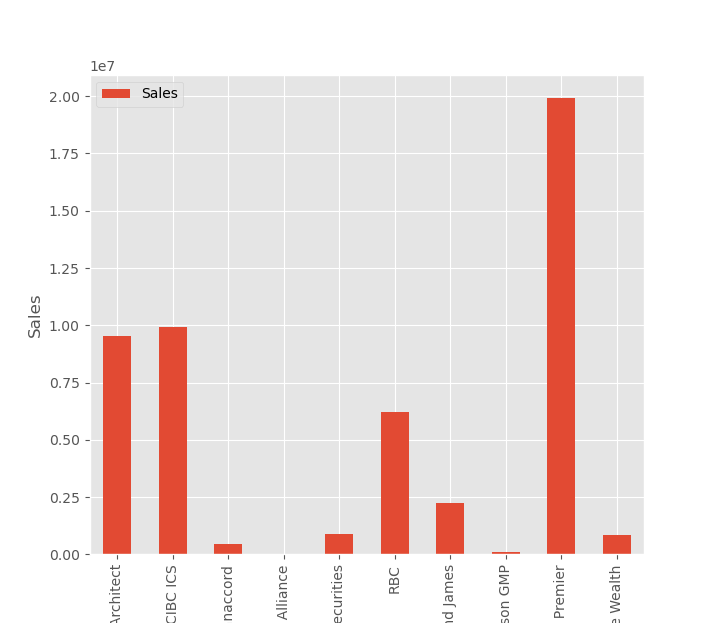

Text(0, 0.5, 'Sales')

In [1138]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
#SMA_platform.x=['Platform']
#SMA_platform.y=['Sales', 'Redemption', 'Assets']
#plt.bar(SMA_platform.x,SMA_platform.y)
#plt.show()
SMA_platform.plot(x='Platform', y='Sales', kind='bar')
matplotlib.pyplot.xlabel("Platform")
matplotlib.pyplot.ylabel("Sales")

# Output

In [1095]:
#SMA.to_excel(r'S:\CAN\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\SMA Data.xlsx', sheet_name='SMA_2022', index = False)

In [1096]:
#File = pd.ExcelWriter(r'S:\CAN\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\SMA.xlsx')

In [1097]:
#SMA.to_excel(File, sheet_name='SMA_2022', index = False)
#SMA_platform.to_excel(File, sheet_name='SMA_Pivot', index = True)
#File.save()

In [1098]:
#SMA1.to_excel(r'S:\CAN\retail\retail sales intelligence\Wealth\Reports - Scheduled\2 - Monthly Reports\SMA\SMA Data Files\SMA Reports-Python\SMA Data.xlsx', sheet_name='SMA_Pivot', index = False)